In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filename = "sort_time_dependency"

In [38]:
cmd = f"./sort 1 > {filename}"
os.system(cmd)

cmd = f"./sort 2 >> {filename}"
os.system(cmd)

for n_threads in range(4, 20, 4):
    cmd = f"./sort {n_threads} >> {filename}"
    os.system(cmd)

In [39]:
df = pd.read_csv(filename, sep="\t")
df

,n_threads,array_size,time
0,1,8,0.317199
1,1,16,0.468942
2,1,32,1.30606
3,1,64,2.30326
4,1,128,3.53603
...,...,...,...
102,16,32768,1557.21
103,16,65536,2399.55
104,16,131072,5257.65
105,16,262144,9926.83


In [40]:
%matplotlib notebook

<IPython.core.display.Javascript object>


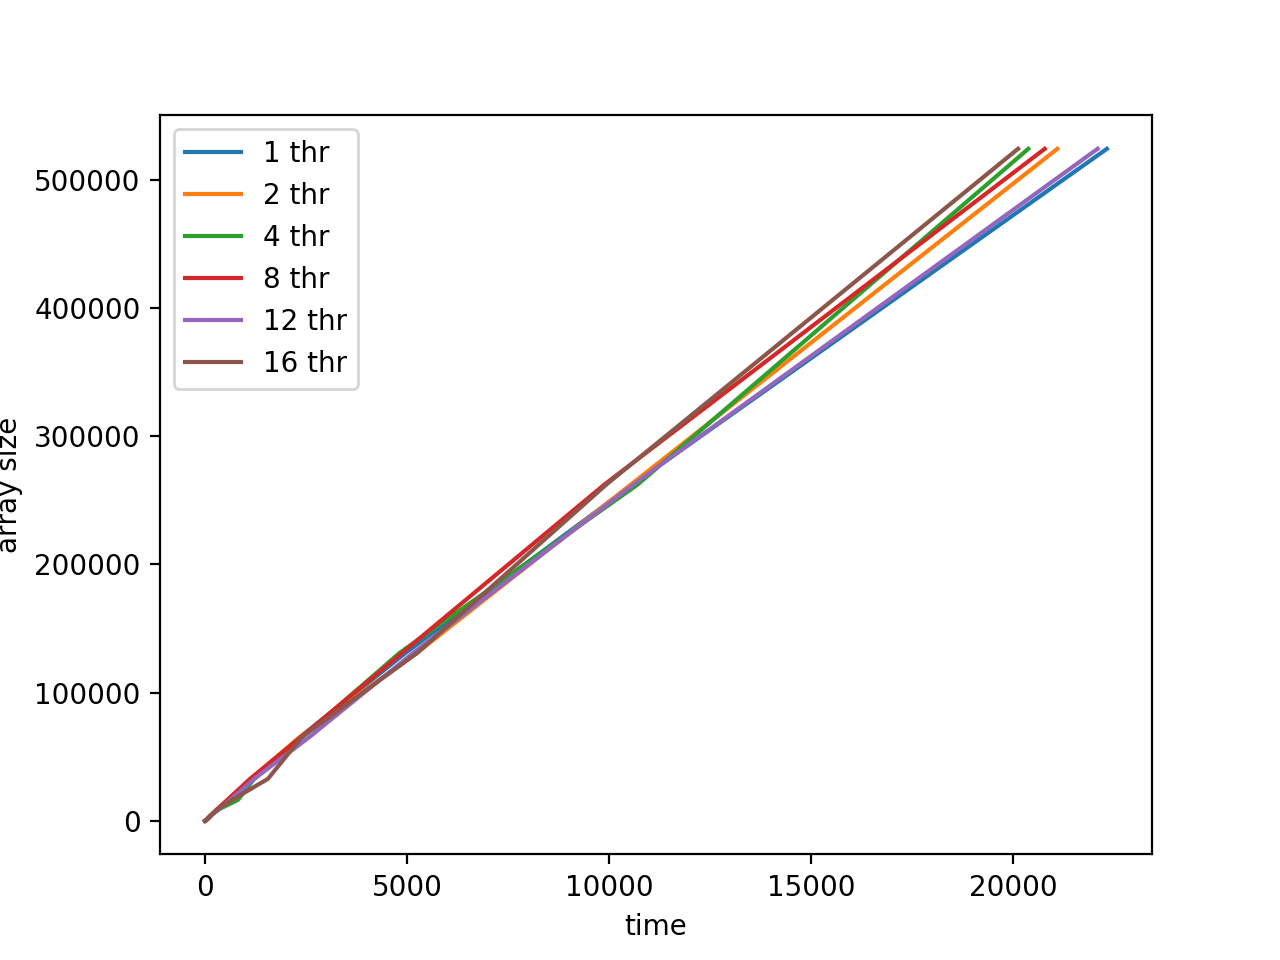

Text(0, 0.5, 'array size')

In [42]:
fig, ax = plt.subplots()
for n_threads in df['n_threads'].unique():
    if n_threads == "n_threads":
        continue
    tmp = df[df['n_threads'] == n_threads]
    ax.plot(np.array(tmp['array_size'], np.array(tmp['time'], dtype=float), dtype=float), label=f"{n_threads} thr")

leg = plt.legend(loc='best')
plt.ylabel("time")
plt.xlabel("array size")